# Analyse des bandes de phonons du matériau mp-31454 (TaRbSu)

<br />

----

## Mise en place du code

In [1]:
# Téléchargement des bandes de phonons du matériau attribué

from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter

k = "zkUgCxiKVvQri3sF2Sx"  # Clé de l'API

with MPRester(k) as m:
    bandStruct = m.get_phonon_bandstructure_by_material_id("mp-31454")  # Récupération de la structure assignée

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [2]:
# Import(s) nécessaire(s) pour la suite du notebook

import pymatgen.phonon.plotter as pbplt
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Dictionnaire des symboles
dsym = {"$\\Gamma$":"Γ","K$\mid$U":"K|U"}

def resolveSym(sym) :
    return sym if sym not in dsym else dsym[sym]

---

## Affichage préalable de la structure de bandes

<br />

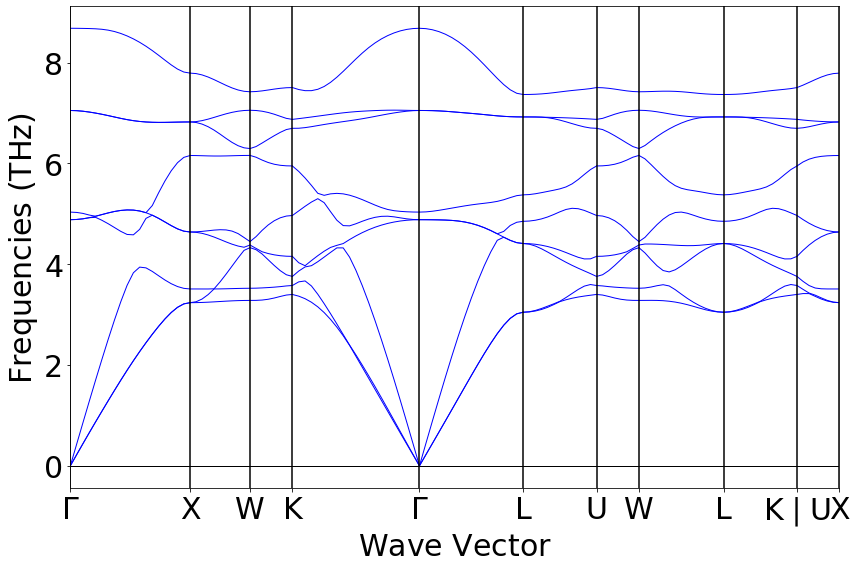

In [4]:
plotBand = pbplt.PhononBSPlotter(bandStruct)
plotBand.show()

---

## Détermination de la vitesse du son

<br />

La vitesse de propagation du son dans un solide est décrite comme étant la vitesse de propagation d'un phonon dans le réseau et s'obtient par la valeur de la dérivée $\frac{\partial \omega_k}{\partial k}$ de la relation de dispersion permettant d'obtenir les différentes bandes dans le graphique précédent. Afin de simplifer les calcul, nous utiliserons le fait que $\omega_k$, la fréquence représentée sur l'axe $y$, pourra être considéré comme étant une fonction linéaire de $k$, le vecteur d'onde, pour des petites valeurs de $k$ (signifiant donc de grandes longueurs d'ondes). Déterminer la vitesse du son revient donc simplement à déterminer la pente de cette approximation linéaire et ce pour des petits vecteurs d'ondes $k$. Il est toutefois nécessaire d'analyser l'ensemble de la dérivée pour obtenir les vitesses maximales et minimales selon $k$. Nous ne traiterons que les trois premières bandes acoustiques dans la suite de ce notebook. Les bandes acoustiques sont celles où la fréquence du phonon associée est nulle au centre de la zone de Brillouin, c'est-à-dire en $\Gamma$.

In [5]:
plotBand = pbplt.PhononBSPlotter(bandStruct)
data = plotBand.bs_plot_data()   # Obtention des informations du graphe

freqs = data['frequency']  # Récupération des valeurs des fréquences pour chaque bande
ticks = data["ticks"]      # Chaque point de la zone de Brillouin considérée

labels = [resolveSym(ticks["label"][i]) for i in [0,1,3,5,7,9,11,13,15,17,18]]
ticDis = ticks['distance']

dists = np.array(list(dict.fromkeys(ticDis)))  # Liste cumulative de la distance parcourue selon l'axe x

dTtT = dists[1:]-dists[:-1]  # Distances respectives entre chaque point considéré

---

### 1. Première bande acoustique dans la direction $\Gamma$ - $L$

<br />

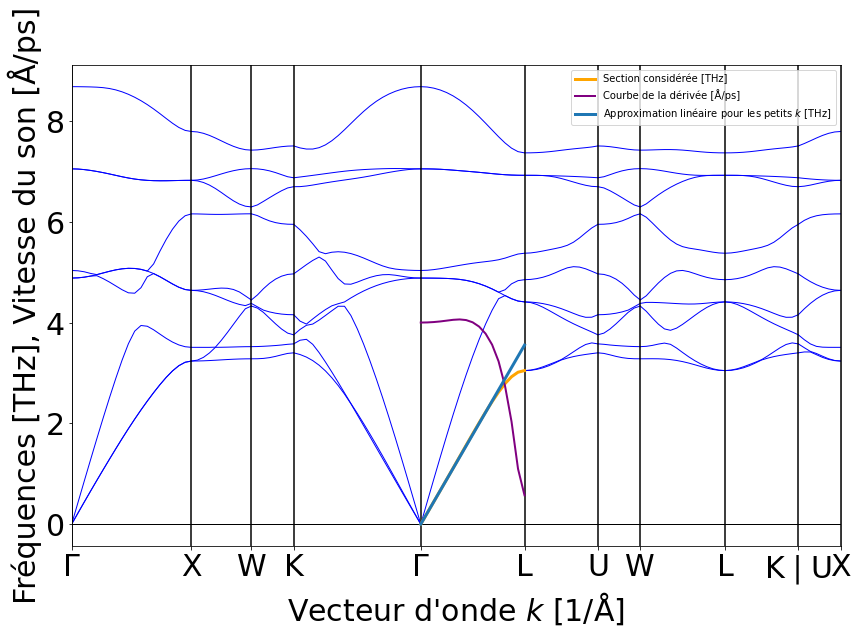

Résultats obtenus pour la première bande acoustique suivant la direction Γ -> L
-------------------------------------------------------------------------------------
Maximum de la vitesse du son : k_max = 0.33307 [1/Å] ; v_max = 4.06392 [Å/ps]
Minimum de la vitesse du son : k_min = 0.88819 [1/Å] ; v_min = 0.57396 [Å/ps]
Valeur de la vitesse du son selon l'approximation linéaire : v_est = 4.00170 [Å/ps]


In [6]:
# Direction de k = Γ -> L pour la première bande

# Création du plot de base
plsb = plotBand.get_plot()

# Récupération des fréquences et infos sur k pour la section considérée
bF1 = freqs[4][0]  # Fréquences de la bande 0 section 4
bK1 = dists[4:6]   # Distance des points 4 et 5
k1,h1 = np.linspace(bK1[0],bK1[1],len(bF1),retstep=True)

# Calcul de la dérivée générale de omega_k
df1 = np.gradient(bF1, h1)

# Approximation linéaire de f
fa1 = df1[0]*k1 - df1[0]*k1[0]

# Affichage sur le graphe
plt.plot(k1,bF1, "orange", linewidth=3, label="Section considérée [THz]")
plt.plot(k1,df1, "purple", linewidth=2, label="Courbe de la dérivée [Å/ps]")
plt.plot(k1,fa1, 'C0',     linewidth=3, label="Approximation linéaire pour les petits $k$ [THz]")

# Affichage du graphe
plt.ylabel("Fréquences [THz], Vitesse du son [Å/ps]")
plt.xlabel("Vecteur d'onde $k$ [1/Å]")
plt.legend()
plt.show()

# Affichage des résultats numériques
print(100*"=")
print(f"Résultats obtenus pour la première bande acoustique suivant la direction {labels[4]} -> {labels[5]}")
print(85*"-")
print(f"Maximum de la vitesse du son : k_max = {k1[np.argmax(df1)]-k1[0]:.5f} [1/Å] ; v_max = {max(df1):.5f} [Å/ps]")
print(f"Minimum de la vitesse du son : k_min = {k1[np.argmin(df1)]-k1[0]:.5f} [1/Å] ; v_min = {min(df1):.5f} [Å/ps]")
print(f"Valeur de la vitesse du son selon l'approximation linéaire : v_est = {df1[0]:.5f} [Å/ps]")
print(100*"=")

---

### 2. Deuxième bande acoustique dans la direction $\Gamma$ - $K$

<br />

Dans le graphique figurant dans la suite de cette sous-section, le parcours se fera, effectivement, de $\Gamma$ vers K impliquant donc une direction opposée à celle communément admise pour l'axe indiquant le vecteur d'onde et ce afin de se positionner proche de $\Gamma$ et ainsi analyser les petits vecteurs d'ondes.

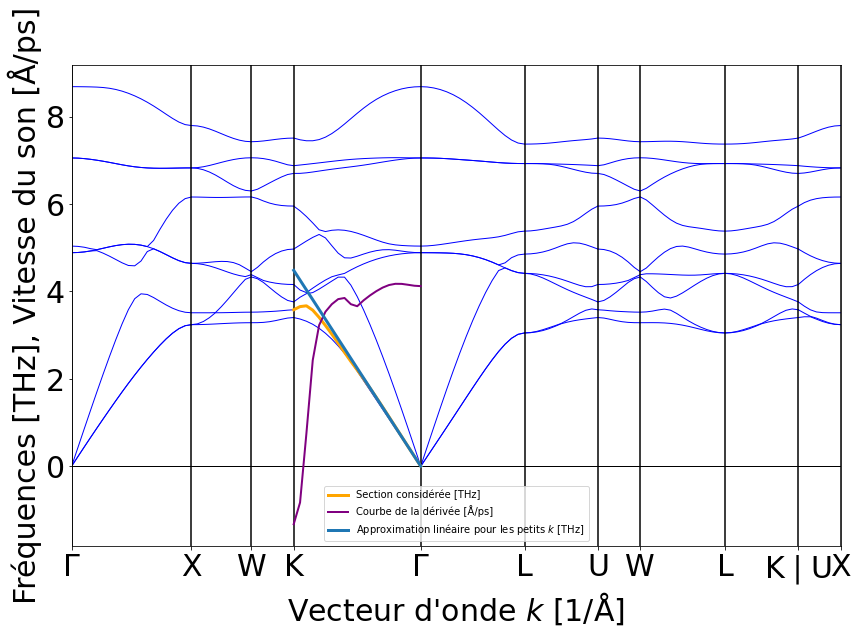

Résultats obtenus pour la deuxième bande acoustique suivant la direction Γ -> K
---------------------------------------------------------------------------
Maximum de la vitesse du son : k_max = 0.21756 [1/Å] ; v_max = 4.17265 [Å/ps]
Minimum de la vitesse du son : k_min = 1.08781 [1/Å] ; v_min = -1.32739 [Å/ps]
Valeur de la vitesse du son selon l'approximation linéaire: v_est = 4.11941 [Å/ps]


In [7]:
# Direction de k = Γ -> K pour la deuxième bande

# Création du plot de base
plsb = plotBand.get_plot()

# Récupération des fréquences et infos sur k pour la section considérée
bF2 = np.flip(np.array(freqs[3][1]))  # Fréquences de la bande 1 section 3 dans le sens Γ -> K
bK2 = np.array(dists[3:5])            # Distance des points 3 et 4
k2,h2 = np.linspace(bK2[0],bK2[1],len(bF2),retstep=True)

# Calcul de la dérivée générale de omega_k
df2 = np.gradient(bF2, h2)

# Approximation linéaire de f
fa2 = df2[0]*k2 - df2[0]*k2[0]

# Affichage sur le graphe
plt.plot(k2,np.flip(bF2), "orange", linewidth=3, label="Section considérée [THz]")
plt.plot(k2,np.flip(df2), "purple", linewidth=2, label="Courbe de la dérivée [Å/ps]")
plt.plot(k2,np.flip(fa2), 'C0',     linewidth=3, label="Approximation linéaire pour les petits $k$ [THz]")

# Affichage du graphe
plt.ylabel("Fréquences [THz], Vitesse du son [Å/ps]")
plt.xlabel("Vecteur d'onde $k$ [1/Å]")
plt.legend()
plt.show()

# Affichage des résultats numériques
print(100*"=")
print(f"Résultats obtenus pour la deuxième bande acoustique suivant la direction {labels[4]} -> {labels[3]}")
print(75*"-")
print(f"Maximum de la vitesse du son : k_max = {k2[np.argmax(df2)]-k2[0]:.5f} [1/Å] ; v_max = {max(df2):.5f} [Å/ps]")
print(f"Minimum de la vitesse du son : k_min = {k2[np.argmin(df2)]-k2[0]:.5f} [1/Å] ; v_min = {min(df2):.5f} [Å/ps]")
print(f"Valeur de la vitesse du son selon l'approximation linéaire: v_est = {df2[0]:.5f} [Å/ps]")
print(100*"=")

Attention, le parcours dans le graphe précédent se fait, effectivement, de $\Gamma$ vers $K$.

---

### 3. Troisième bande acoustique dans la direction $\Gamma$ - $X$

<br />

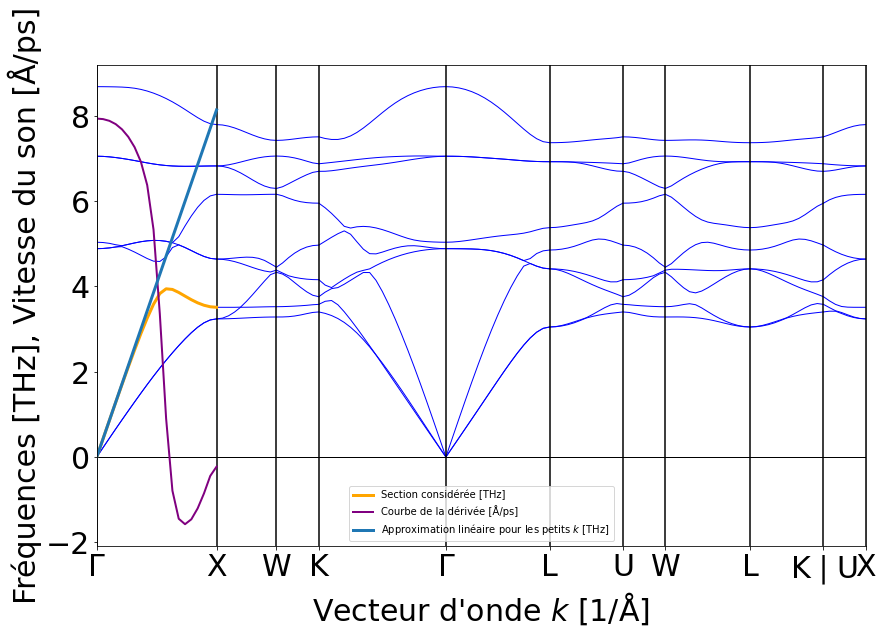

Résultats obtenus pour la troisième bande acoustique suivant la direction Γ -> X
---------------------------------------------------------------------------
Maximum de la vitesse du son : k_max = 0.00000 [1/Å] ; v_max = 7.93497 [Å/ps]
Minimum de la vitesse du son : k_min = 0.75570 [1/Å] ; v_min = -1.57585 [Å/ps]
Valeur de la vitesse du son selon l'approximation linéaire: v_est = 7.93497 [Å/ps]


In [8]:
# Direction de k = Γ -> X pour la troisième bande

# Création du plot de base
plsb = plotBand.get_plot()

# Récupération des fréquences et infos sur k pour la section considérée
bF3 = freqs[0][2]  # Fréquences de la bande 2 section 0
bK3 = dists[0:2]   # Distances des points 0 et 1
k3,h3 = np.linspace(bK3[0],bK3[1],len(bF3),retstep=True)

# Calcul de la dérivée générale de omega_k
df3 = np.gradient(bF3, h3)

# Approximation linéaire de f
fa3 = df3[0]*k3 - df3[0]*k3[0]

# Affichage sur le graphe
plt.plot(k3,bF3, "orange", linewidth=3, label="Section considérée [THz]")
plt.plot(k3,df3, "purple", linewidth=2, label="Courbe de la dérivée [Å/ps]")
plt.plot(k3,fa3, 'C0',     linewidth=3, label="Approximation linéaire pour les petits $k$ [THz]")

# Affichage du graphe
plt.ylabel("Fréquences [THz], Vitesse du son [Å/ps]")
plt.xlabel("Vecteur d'onde $k$ [1/Å]")
plt.legend()
plt.show()

# Affichage des résultats numériques
print(100*"=")
print(f"Résultats obtenus pour la troisième bande acoustique suivant la direction {labels[0]} -> {labels[1]}")
print(75*"-")
print(f"Maximum de la vitesse du son : k_max = {k3[np.argmax(df3)]-k3[0]:.5f} [1/Å] ; v_max = {max(df3):.5f} [Å/ps]")
print(f"Minimum de la vitesse du son : k_min = {k3[np.argmin(df3)]-k3[0]:.5f} [1/Å] ; v_min = {min(df3):.5f} [Å/ps]")
print(f"Valeur de la vitesse du son selon l'approximation linéaire: v_est = {df3[0]:.5f} [Å/ps]")
print(100*"=")